In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import statsmodels.api as sm
from sklearn.metrics import r2_score

C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def return_normal_distribution(mean, size, std):
    '''
    Returns samples following a normal distribution
    '''
    output = np.random.normal(loc=mean,size=size, scale=std)
    return output

def return_weibull_distribution(alpha, size):
    '''
    Returns samples following a weibull distribution
    '''
    gammaV = gamma(1 + 1/alpha)
    output = np.random.weibull(a=(gammaV), size=size)
    return output

def return_pareto_distribution(alpha, size, scale):
    '''
    Returns samples following a pareto distribution
    '''
    output = (np.random.pareto(a=alpha, size=size) + 1) * scale
    return output


In [28]:
num_data_points = 10000
normal = return_normal_distribution(1, num_data_points, 1)
weibull = return_weibull_distribution(0.3, num_data_points)
pareto_1 = return_pareto_distribution(1.5, num_data_points, 1/3)
pareto_2 = return_pareto_distribution(0.5, num_data_points, 1/3)

# Law of Large Numbers #

In [4]:
def plot_cum_n(n, lst, title, xLabel, yLabel, fileName):
    '''
    Plots cumulative sum S_n vs. n
    @param n - the range for the x axis
    @param lst - the actual samples to plot
    '''
    cumulative_sums = np.cumsum(lst)[:n]
    x_axis = [i for i in range(1, n+1)]
    plt.ylabel(yLabel)
    plt.title(title)
    plt.xlabel(xLabel)
    #plt.xlim(0, n)
    #plt.ylim((0, 1))
    plt.plot(x_axis, cumulative_sums[:n])
    plt.savefig(fileName, bbox_inches='tight')
    plt.show()
    

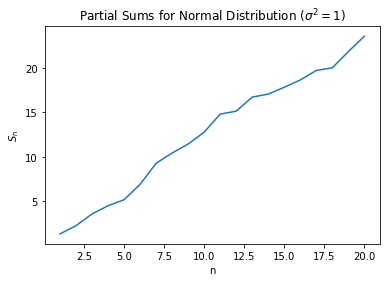

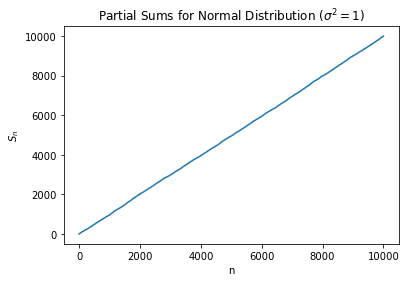

In [5]:
plot_cum_n(20, normal, r"Partial Sums for Normal Distribution ($\sigma^2 = 1$)", "n", "$S_n$", "normal_a_20")
plot_cum_n(num_data_points, normal, r"Partial Sums for Normal Distribution ($\sigma^2 = 1$)", "n", "$S_n$", "normal_a_10k")

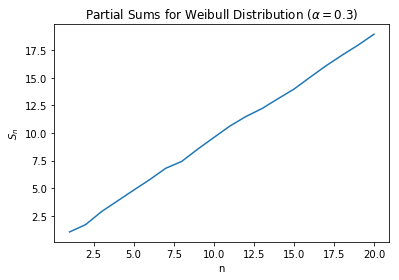

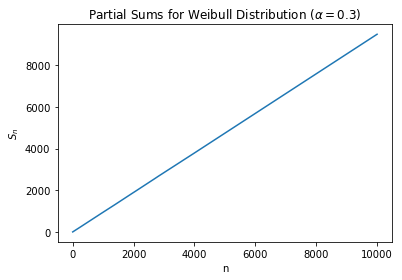

In [6]:
plot_cum_n(20, weibull, r"Partial Sums for Weibull Distribution $(\alpha = 0.3)$", "n", "$S_n$", "weibull_a_20")
plot_cum_n(num_data_points, weibull, r"Partial Sums for Weibull Distribution $(\alpha = 0.3)$", "n", "$S_n$", "weibull_a_10k")

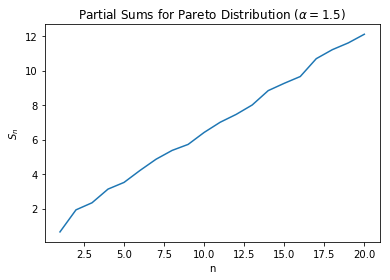

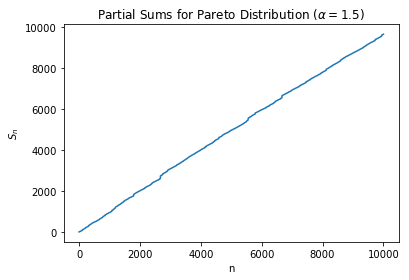

In [7]:
plot_cum_n(20, pareto_1, r"Partial Sums for Pareto Distribution $(\alpha = 1.5)$", "n", "$S_n$", "pareto1_a_20")
plot_cum_n(num_data_points, pareto_1, r"Partial Sums for Pareto Distribution $(\alpha = 1.5)$", "n", "$S_n$", "pareto1_a_10k")

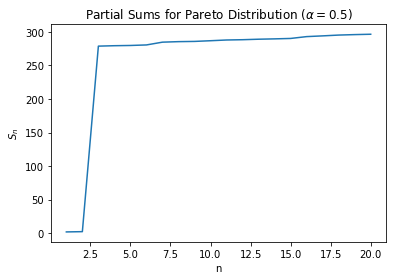

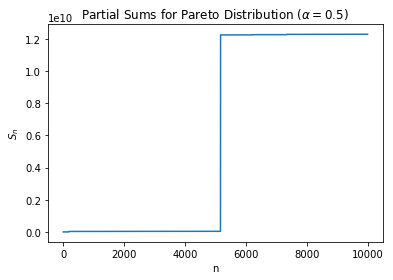

In [8]:
plot_cum_n(20, pareto_2, r"Partial Sums for Pareto Distribution $(\alpha = 0.5)$", "n", "$S_n$", "pareto2_a_20")
plot_cum_n(num_data_points, pareto_2, r"Partial Sums for Pareto Distribution $(\alpha = 0.5)$", "n", "$S_n$", "pareto2_a_10k")

# Central Limit Theorem #

In [9]:
def plot_deviations(n, lst, title, xLabel, yLabel, fileName):
    '''
    Plots derivations of datapoints from the mean vs. n
    @param n - the range for the x axis
    @param lst - the actual samples to plot
    '''
    cumulative_sums = np.cumsum(lst)[:n]
    deviations = []
    for i in range(1, n+1):
        deviations.append((cumulative_sums[i-1] - (i))/np.sqrt((i)))
    x_axis = [i for i in range(1, n+1)]
    plt.ylabel(yLabel)
    plt.title(title)
    plt.xlabel(xLabel)
    #plt.xlim(0, n)
    #plt.ylim((0, 1))
    plt.plot(x_axis, deviations)
    plt.savefig(fileName, bbox_inches='tight')
    plt.show()

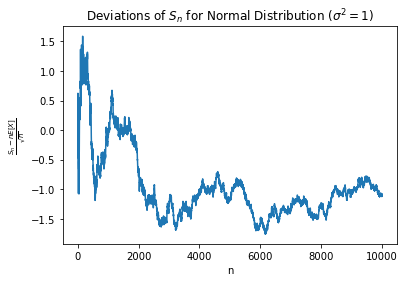

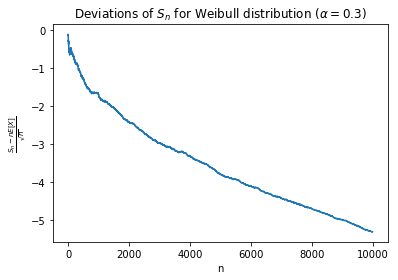

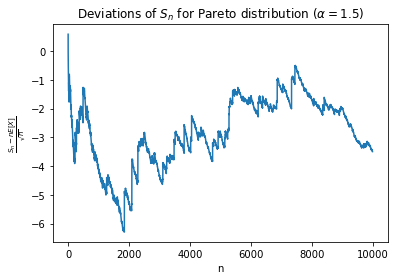

In [29]:
plot_deviations(num_data_points, normal, r"Deviations of $S_n$ for Normal Distribution ($\sigma^2 = 1$)", "n", r"$\frac{S_n - nE[X]}{\sqrt{n}}$", "normal_b_10k")
plot_deviations(num_data_points, weibull, r"Deviations of $S_n$ for Weibull distribution ($\alpha = 0.3$)", "n", r"$\frac{S_n - nE[X]}{\sqrt{n}}$", "weibull_10k")
plot_deviations(num_data_points, pareto_1, r"Deviations of $S_n$ for Pareto distribution ($\alpha = 1.5$)", "n", r"$\frac{S_n - nE[X]}{\sqrt{n}}$", "pareto1_10k")

# The 80-20 rule #

In [11]:
def calculate_wealth(lsts, labels, title, xLabel, yLabel, fileName):
    '''
    Plots the fraction of the total income of the city held by the wealthiest r% of the population vs. r
    for each distribution of lsts
    '''
    assert(len(lsts) == len(labels))
    for i in range(len(lsts)):
        lst = lsts[i]
        lst.sort()
        proportions = []
        population = len(lst)
        x_axis = [i for i in range(1,21)]
        topR = [int(r/100 * population) for r in range (1,21)]
        totalWealth = sum(lst)
        for j in topR:
            topRWealth = sum(lst[len(lst)-j:])
            proportions.append(topRWealth/totalWealth)
        plt.plot(x_axis, proportions, label=labels[i])
    
    plt.ylabel(yLabel)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.legend(loc='best')
    plt.savefig(fileName, bbox_inches='tight')
    plt.show()

In [12]:
distributions = [weibull, pareto_1, pareto_2]
labels = [r'Weibull ($\alpha = 0.3$)', r'Pareto ($\alpha = 1.5$)', r'Pareto ($\alpha = 0.5$)']

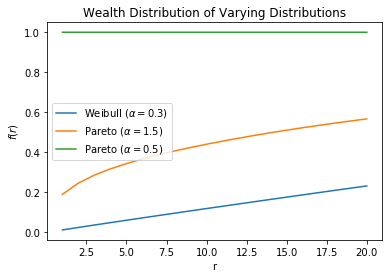

In [13]:
calculate_wealth(distributions, labels, r"Wealth Distribution of Varying Distributions", "r", r"$f(r)$", "2c")

In [14]:
def plot_frequency(lst, title, xLabel, yLabel, fileName, numBins):
    hist, bins = np.histogram(lst, bins=numBins, normed=False)
    bin_centers = (bins[1:]+bins[:-1])*0.5
    nonzero_indices = [i for i in range(len(bin_centers)) if hist[i] != 0]
    non_zero_bins = np.asarray([bin_centers[i] for i in nonzero_indices])
    non_zero_hist = np.asarray([hist[i] for i in nonzero_indices])
    bins_log = np.log(non_zero_bins)
    hist_log = np.log(non_zero_hist)
    plt.scatter(np.log(bin_centers), np.log(hist))
    coeffs = np.polyfit(bins_log, hist_log, 1)
    print(coeffs)
    plt.plot(bins_log, bins_log * coeffs[0] + coeffs[1], color='green')
    r2 = r2_score(hist_log, bins_log* coeffs[0] + coeffs[1])
    print(r2)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.legend(loc='best')
    plt.savefig(fileName, bbox_inches='tight')
    plt.show()

In [15]:
normal_filtered = list(filter(lambda x: x >= 0, normal))

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


[-0.8247539   3.65514241]
0.358773129934


C:\Users\Andrew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


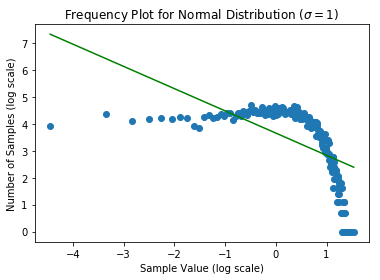

In [16]:
plot_frequency(normal_filtered, r"Frequency Plot for Normal Distribution $(\sigma = 1)$", "Sample Value (log scale)", "Number of Samples (log scale)",  "normal_frequency", 200)

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


[ 3.05083969  3.79548247]
0.311732703627


C:\Users\Andrew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


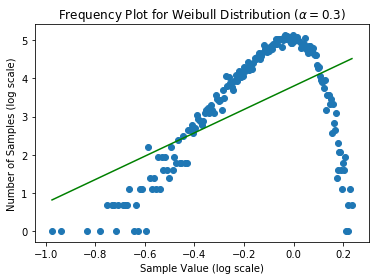

In [17]:
plot_frequency(weibull, r"Frequency Plot for Weibull Distribution ($\alpha = 0.3$) ", "Sample Value (log scale)", "Number of Samples (log scale)",  "weibull_frequency", 200)

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


[-1.56099583  4.67989436]
0.785187040676


C:\Users\Andrew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


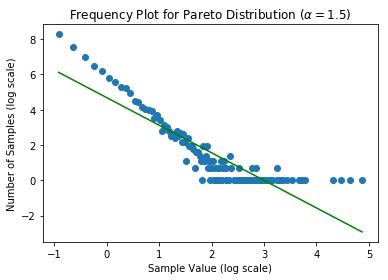

In [18]:
plot_frequency(pareto_1, r"Frequency Plot for Pareto Distribution ($\alpha = 1.5$) ", "Sample Value (log scale)", "Number of Samples (log scale)",  "pareto_1_frequency", 1000)

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


[-0.24837278  3.39370473]
0.228923827388


C:\Users\Andrew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


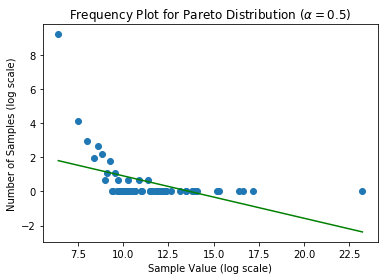

In [25]:
plot_frequency(pareto_2, r"Frequency Plot for Pareto Distribution ($\alpha = 0.5$) ", "Sample Value (log scale)", "Number of Samples (log scale)",  "pareto_2_frequency", 10000000)

In [26]:
def plot_rank(values, title, xLabel, yLabel, fileName):
    '''
    This function generates rank plots of a given
    distribution
    '''
    values.sort()
    x_log = np.log(values)
    y_log = np.log(np.arange(len(values)))[::-1]
    nonzero_indices = [i for i in range(len(y_log)) if y_log[i] > 0]
    non_zero_x = np.asarray([x_log[i] for i in nonzero_indices])
    non_zero_y = np.asarray([y_log[i] for i in nonzero_indices])
    coeffs = np.polyfit(non_zero_x, non_zero_y, 1)
    print(coeffs)
    plt.plot(x_log, x_log * coeffs[0] + coeffs[1], color='green')
    plt.scatter(x_log, y_log)
    #plt.ylabel(yLabel
    plt.title(title)
    #plt.xlabel(xLabel)
    r2 = r2_score(non_zero_y, non_zero_x* coeffs[0] + coeffs[1])
    print(r2)
    plt.legend(loc='best')
    plt.savefig(fileName, bbox_inches='tight')
    plt.show()

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


[-0.73413362  8.01114903]
0.486822097445


C:\Users\Andrew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


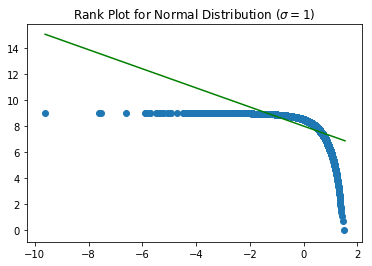

In [21]:
plot_rank(normal_filtered, r"Rank Plot for Normal Distribution $(\sigma = 1)$", '', '', 'normal_rank' )

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


[-5.69077995  7.85981008]
0.616085914978


C:\Users\Andrew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


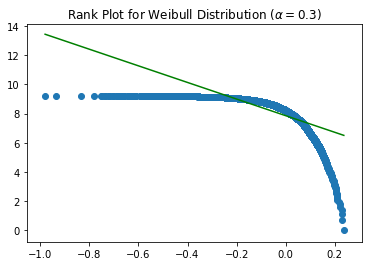

In [22]:
plot_rank(weibull, r"Rank Plot for Weibull Distribution $(\alpha = 0.3)$", '', '', 'weibull_rank' )

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


[-1.50882187  7.56252679]
0.999555565809


C:\Users\Andrew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


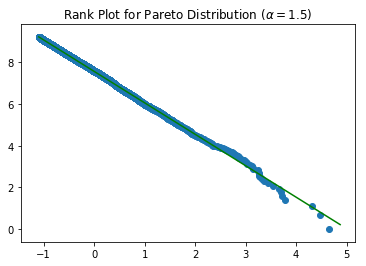

In [23]:
plot_rank(pareto_1, r"Rank Plot for Pareto Distribution $(\alpha = 1.5)$", '', '', 'pareto1_rank' )

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


[-0.49292444  8.66542989]
0.999477597067


C:\Users\Andrew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


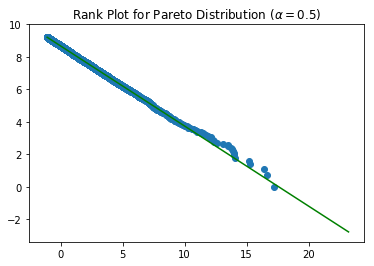

In [24]:
plot_rank(pareto_2, r"Rank Plot for Pareto Distribution $(\alpha = 0.5)$", '', '', 'pareto2_rank' )